In [1]:
import sys, os
import ROOT
from pprint import pprint
from glob import glob
from CMS_lumi import CMS_lumi

ROOT.gROOT.LoadMacro("../interface/tdrstyle.C")
ROOT.gROOT.ProcessLine("setTDRStyle();")

Welcome to JupyROOT 6.24/02


0

In [9]:
region = "EB"

fDa = [
    "../miniTree/UL2016preVFP/miniTree_Data_UL2016preVFP.root",
    "../miniTree/UL2016postVFP/miniTree_Data_UL2016postVFP.root",
    "../miniTree/UL2017/miniTree_Data_UL2017.root",
    "../miniTree/UL2018/miniTree_Data_UL2018.root"
]
fZg = [
    "../miniTree/UL2016preVFP/miniTree_ZGToLLG_UL2016preVFP.root",
    "../miniTree/UL2016postVFP/miniTree_ZGToLLG_UL2016postVFP.root",
    "../miniTree/UL2017/miniTree_ZGToLLG_UL2017.root",
    "../miniTree/UL2018/miniTree_ZGToLLG_UL2018.root",
    
    "../miniTree/UL2016preVFP/miniTree_TTJets_UL2016preVFP.root",
    "../miniTree/UL2016postVFP/miniTree_TTJets_UL2016postVFP.root",
    "../miniTree/UL2017/miniTree_TTJets_UL2017.root",
    "../miniTree/UL2018/miniTree_TTJets_UL2018.root"
    
]

cut = "isEBPho_Lead" if region == "EB" else "isEEPho_Lead"
sel_basic = " && ".join([
    # "Z_reg.M() > 80 && Z_reg.M() < 100",
    "eleHDALRegPt_Lead > 25",
    cut
])
print("[INFO] Pre selections: {}".format(sel_basic), flush=True)

# perform the energy scale correction
# ROOT.EnableImplicitMT(10)
rdf_Zg = ROOT.RDataFrame("miniTree", fZg).Filter(sel_basic).Define("zMass_reg", "Z_reg.M()")
rdf_Da = ROOT.RDataFrame("miniTree", fDa).Filter(sel_basic).Define("zMass_reg", "Z_reg.M()")


[INFO] Pre selections: eleHDALRegPt_Lead > 25 && isEBPho_Lead


In [10]:
hMass_Da = rdf_Da.Histo1D(("hDa", " ", 20, 80, 100), "zMass_reg").GetPtr()
hMass_Zg = rdf_Zg.Histo1D(("hZg", " ", 20, 80, 100), "zMass_reg", "wei").GetPtr()

hMass_MC = hMass_Zg.Clone("hMC")
hMass_MC.Scale(hMass_Da.Integral()/hMass_MC.Integral())

hMass_Ra = hMass_Da.Clone()
hMass_Ra.Divide(hMass_MC)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


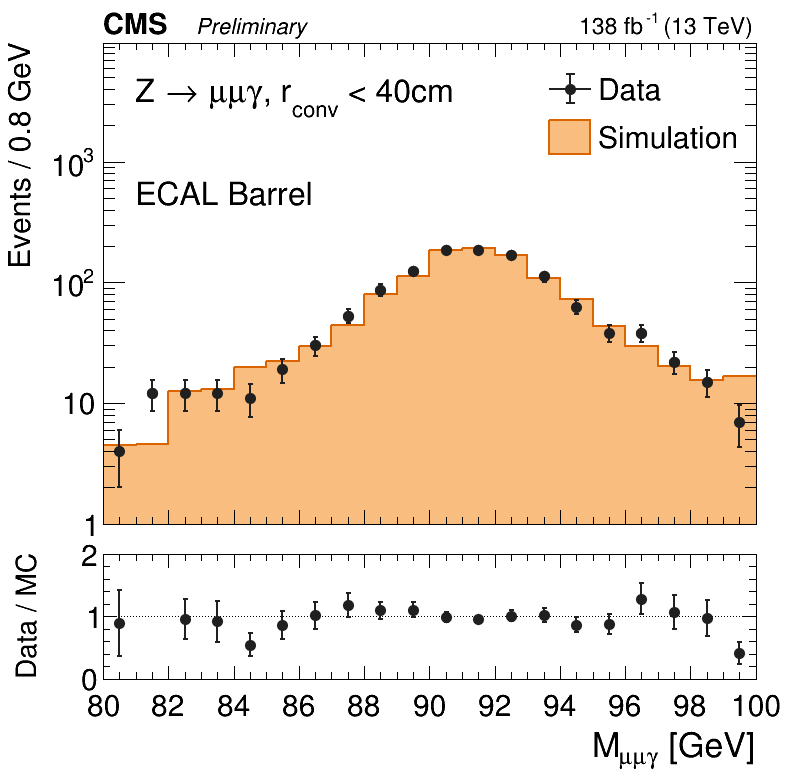

In [11]:
# plotting
ROOT.gStyle.SetErrorX(0.0005)
c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

pad1 = ROOT.TPad("pad1", " ", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.05)
pad1.SetTopMargin(0.08)
pad1.SetRightMargin(0.05)
pad1.SetLeftMargin(0.13)
pad1.SetBottomMargin(0.03)
pad1.Draw()
pad1.cd()
pad1.SetLogy()

hMass_Da.GetXaxis().SetTitle("")
hMass_Da.GetYaxis().SetTitle("Events / 0.8 GeV")

hMass_Da.GetYaxis().SetRangeUser(1, hMass_MC.GetBinContent(hMass_MC.GetMaximumBin()) * 50)
hMass_Da.GetYaxis().SetTickSize(0.03)
hMass_Da.GetYaxis().SetTitleSize(0.06)
hMass_Da.GetYaxis().SetLabelSize(0.06)
hMass_Da.GetYaxis().SetTitleOffset(1.1)

hMass_Da.GetXaxis().SetTickSize(0.03)
hMass_Da.GetXaxis().SetTitleSize(0.06)
hMass_Da.GetXaxis().SetLabelSize(0.05)
hMass_Da.GetXaxis().SetLabelOffset(0.1)
hMass_Da.GetXaxis().SetTitleOffset(1)
hMass_Da.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hMass_Da.SetMarkerSize(1.4)
hMass_Da.SetMarkerStyle(20)
hMass_Da.SetLineColor(ROOT.TColor.GetColor("#202020"))
hMass_Da.SetLineWidth(2)
hMass_Da.Draw("E1P")

hMass_MC.SetFillColor(ROOT.TColor.GetColor("#F8BD7F"))
hMass_MC.SetLineColor(ROOT.TColor.GetColor("#DB6401"))
hMass_MC.SetLineWidth(2)
hMass_MC.Draw("hist same")
hMass_Da.Draw("E1P SAME")

CMS_lumi(pad1, 5, 0, "138 fb^{-1}", 2017, True, "Preliminary", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.065)
ltx.DrawLatex(0.17, 0.81, "Z #rightarrow #mu#mu#gamma, r_{conv} < 40cm")

extral = "ECAL Barrel" if "EB" in region else "ECAL Endcap"
ltx1 = ROOT.TLatex()
ltx1.SetNDC()
ltx1.SetTextFont(42)
ltx1.SetTextSize(0.065)
# ltx1.DrawLatex(0.17, 0.7, "Loose MVA ID")
ltx1.DrawLatex(0.17, 0.62, extral)

leg = ROOT.TLegend(0.68, 0.7, 0.97, 0.88)
leg.SetTextSize(0.06)
leg.AddEntry(hMass_Da, "Data", "lep")
leg.AddEntry(hMass_MC, "Simulation", "f")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

pad1.RedrawAxis()

c1.cd()

pad2 = ROOT.TPad("pad2", "", 0, 0, 1, 0.3)
pad2.SetGridy()
pad2.SetRightMargin(0.05)
pad2.SetLeftMargin(0.13)
pad2.SetTopMargin(0.06)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

hMass_Ra.SetName("")
hMass_Ra.SetTitle("")
hMass_Ra.GetXaxis().SetTitle("M_{#mu#mu#gamma} [GeV]")
hMass_Ra.GetYaxis().SetTitle("Data / MC")
hMass_Ra.GetYaxis().SetRangeUser(0 , 2)

hMass_Ra.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hMass_Ra.SetMarkerSize(1.4)
hMass_Ra.SetMarkerStyle(20)
hMass_Ra.SetLineColor(ROOT.TColor.GetColor("#202020"))
hMass_Ra.SetLineWidth(2)

hMass_Ra.GetXaxis().SetTickSize(0.03 * (7/3.))
hMass_Ra.GetXaxis().SetTitleSize(0.16)
hMass_Ra.GetXaxis().SetTitleOffset(1.2)
hMass_Ra.GetXaxis().SetLabelSize(0.06  * (7/3.))
hMass_Ra.GetXaxis().SetLabelOffset(0.05)
hMass_Ra.GetYaxis().SetTitleSize(0.13)
hMass_Ra.GetYaxis().SetTitleOffset(0.2 * (7/3.))
hMass_Ra.GetYaxis().SetLabelSize(0.06  * (7/3.))
hMass_Ra.GetYaxis().SetNdivisions(502)
hMass_Ra.Draw("E1P")

c1.Draw()

In [5]:
directory = "../plots/Zmass"
if not os.path.exists(directory):
    os.makedirs(directory)
c1.Print("{}/Zmass_reg_{}.pdf".format(directory, region))
c1.Close()

Info in <TCanvas::Print>: pdf file ../plots/Zmass/Zmass_reg_EE.pdf has been created
